# San Francisco Airport Data Analysis by Marlon Diaz
The dataset is provided by San Francisco Open Data, a monthly statistics by Airlines in San Francisco International Airport. The raw data was downloaded on my laptop and can be viewed in Excel and contains the information about the passenger data air traffic statistics at San Francisco International Airport (SFO) from July 2005 to March 2013. I intend to do some analysis in Python based on the air traffic provided in the data set.

Source: https://data.sfgov.org/browse

# What is Pandas DataFrame ?

A Pandas DataFrame is a two-dimensional, tabular data structure in Python that provides flexibility and powerful capabilities for data manipulation and analysis. It is one of the primary data structure provided by the Pandas library.

To use Pandas, you first need to import the library: Since pandas is not part of the Python standard library, we have to first tell Python to load (import) the library.

In [1]:
import pandas

# Next

Next, you create a DataFrame by passing a dictionary, a Numpy array, or a CSV/Excel file to the `pandas.DataFrame()` function.

Let's take a look.

# Creating a DataFrame from a CSV file.

With the library loaded, we can use the `df= pandas.read_csv("data.csv)` function to load a CSV data file.

To access the read_csv function from Pandas, we use dot notation.

In [195]:
# by default the read_csv function will read a comma-separated file;

df = pandas.read_csv('MonthlyPassengerData_200507_to_201303.csv')

# we use the head method so Python shows us only the first 20 rows

df.head(20)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263
6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500
7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050
8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638
9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998


Once you have a DataFrame, you can perform various operations on it. Some Common operations include:

- Accessing and manipulating individual columns or rows of the DataFrame.
- Filtering and selecting specific subsets of data based on conditions.
- Applying mathematical or statistical operations to columns.
- Merging, joining, or concatenating multiple DataFrames.
- Handling missing data and dealing with duplicates.

As we can see there are multiple columns in our dataset, but for analysis we will use
- Operating Airline
- Geo Region
- Geo Summary
- Passenger Count
- Price Category Code
- Activity Period
- Terminal
- and Flights held by each airline.

Also, I see the need to convert the `Activity Period` column to a proper `datetime` format.

To begin, I want to determine potential outliers and get some insights about our data, let’s make some plots using Python
data visualization library Seaborn.

Seaborn is an amazing visualization library for statistical graphics plotting in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. It is built on the top of matplotlib library and also closely integrated to the data structures from pandas.

More information on Seaborn found here: https://seaborn.pydata.org

# PLOT

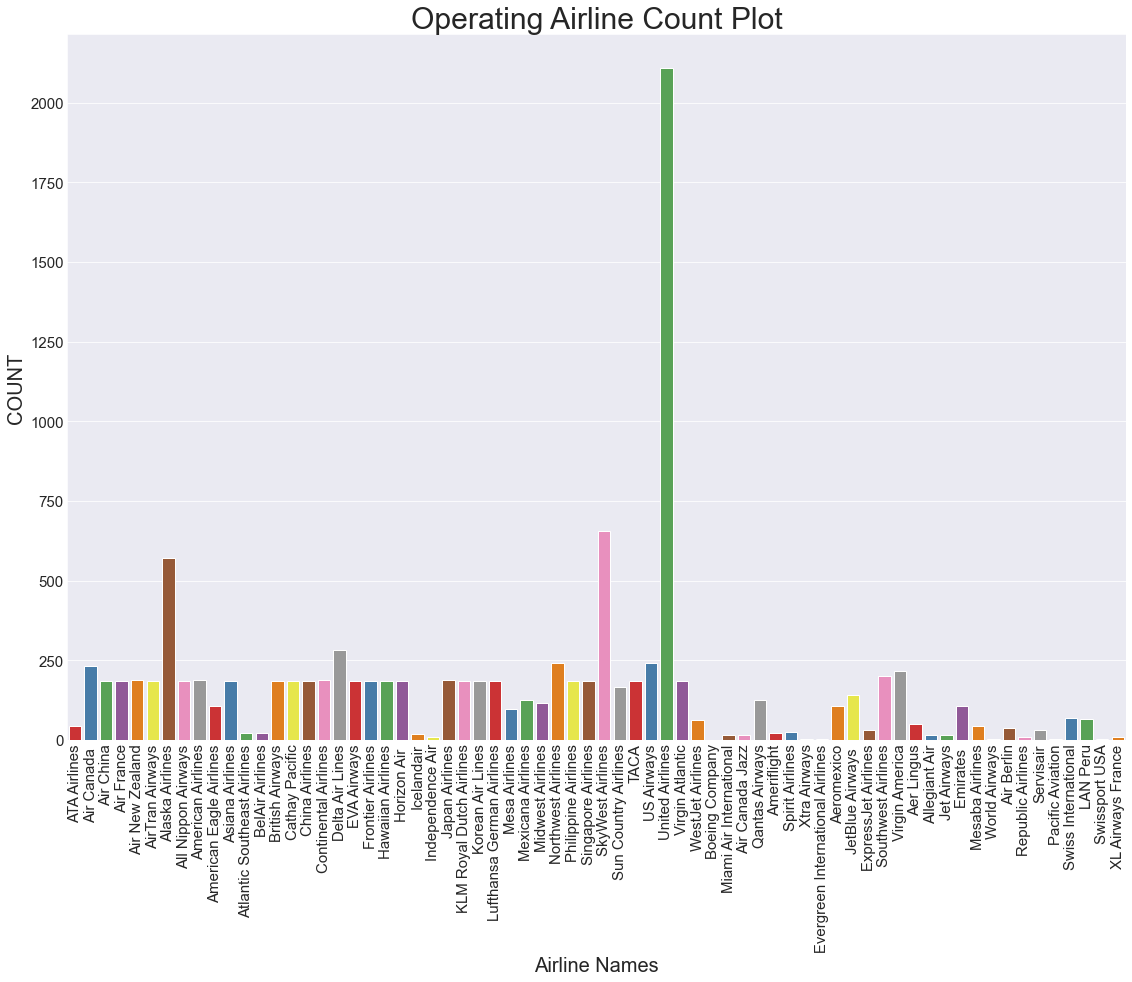

In [266]:
# Show the counts of observations in each categorical bin using bars.
# A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

import seaborn as sns # data visualisation
import matplotlib.pyplot as plt # data visualisation

plt.figure(figsize = (15,10))
sns.countplot(data = df, x = "Operating Airline", palette = "Set1")
plt.title("Operating Airline Count Plot", size = 30)
plt.xlabel("Airline Names", fontsize = 20)
plt.xticks(rotation = 90, fontsize=15)
plt.ylabel("COUNT", fontsize = 20)
plt.yticks(rotation = 0, fontsize=15)
plt.show()


We can see that United Airlines has the highest traffic at SFO airport.

# Next
Let’s see the frequency plot of Countries that hold flights at SFO between the years 2005 and 2013.

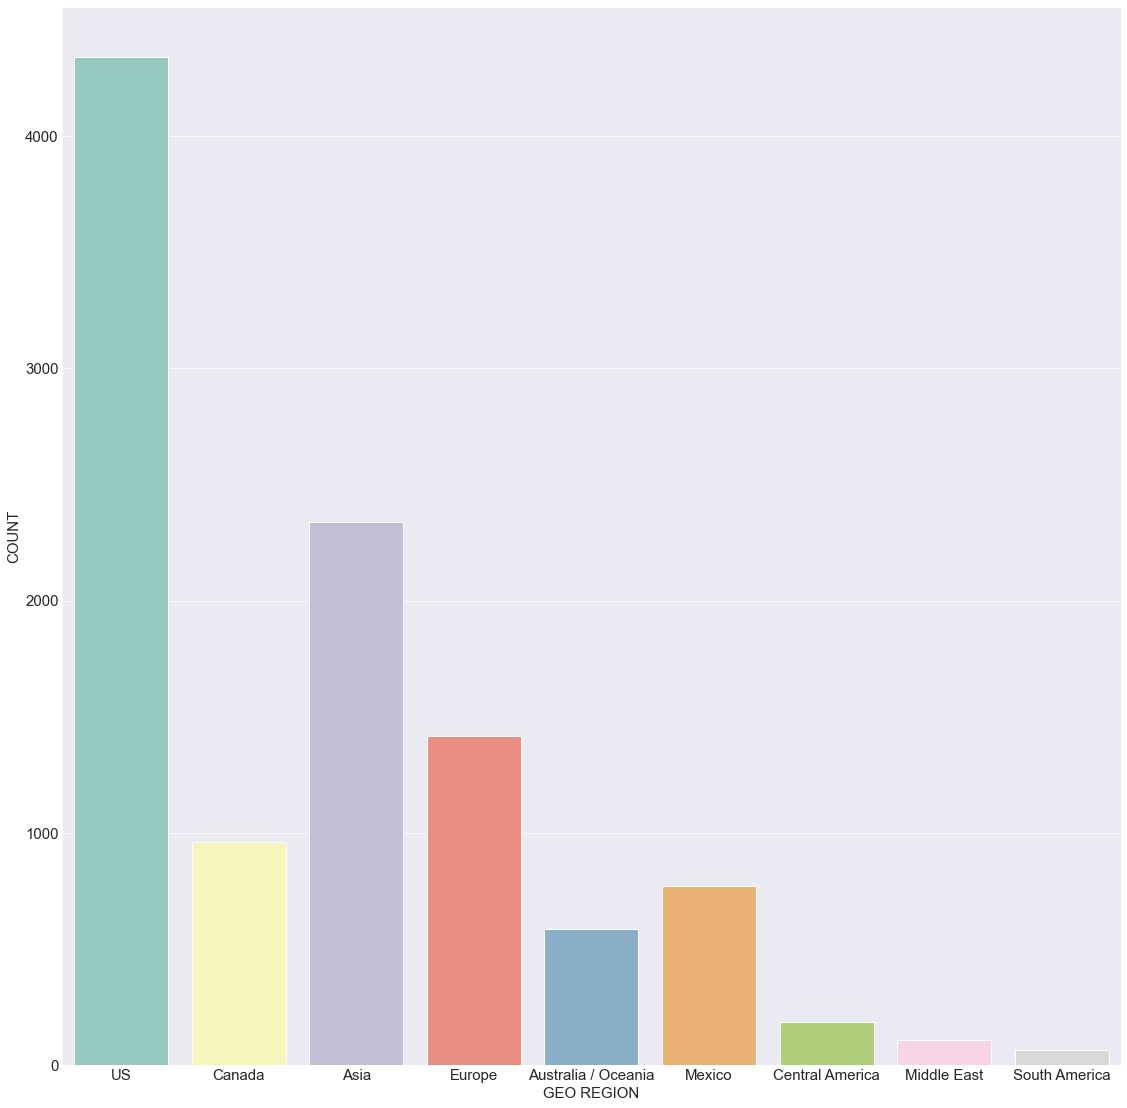

In [421]:
plt.figure(figsize = (15,15))
sns.countplot(x = "GEO Region", palette = "Set3",data = df)
plt.xticks(fontsize=15, rotation = 0)
plt.xlabel("GEO REGION", fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("COUNT", fontsize=15)
plt.show()

Review data and arrive at relevant conclusions:

Above, we can see most of the flights are in the USA and is the leader among the countries, that is because our outlier Airline (United Airlines). For international flights we can see that SFO is a major gateway to Asia, Europe, Mexico, and the Middle East. Most of the flights are in and out of Asia, followed by Europe.

We can obviously see that either Countries or Airlines can be separated into some groups by the amount of flights they held.

# Next
Showing the number of domestic and international flights through SFO airport between 2005 and 2013.

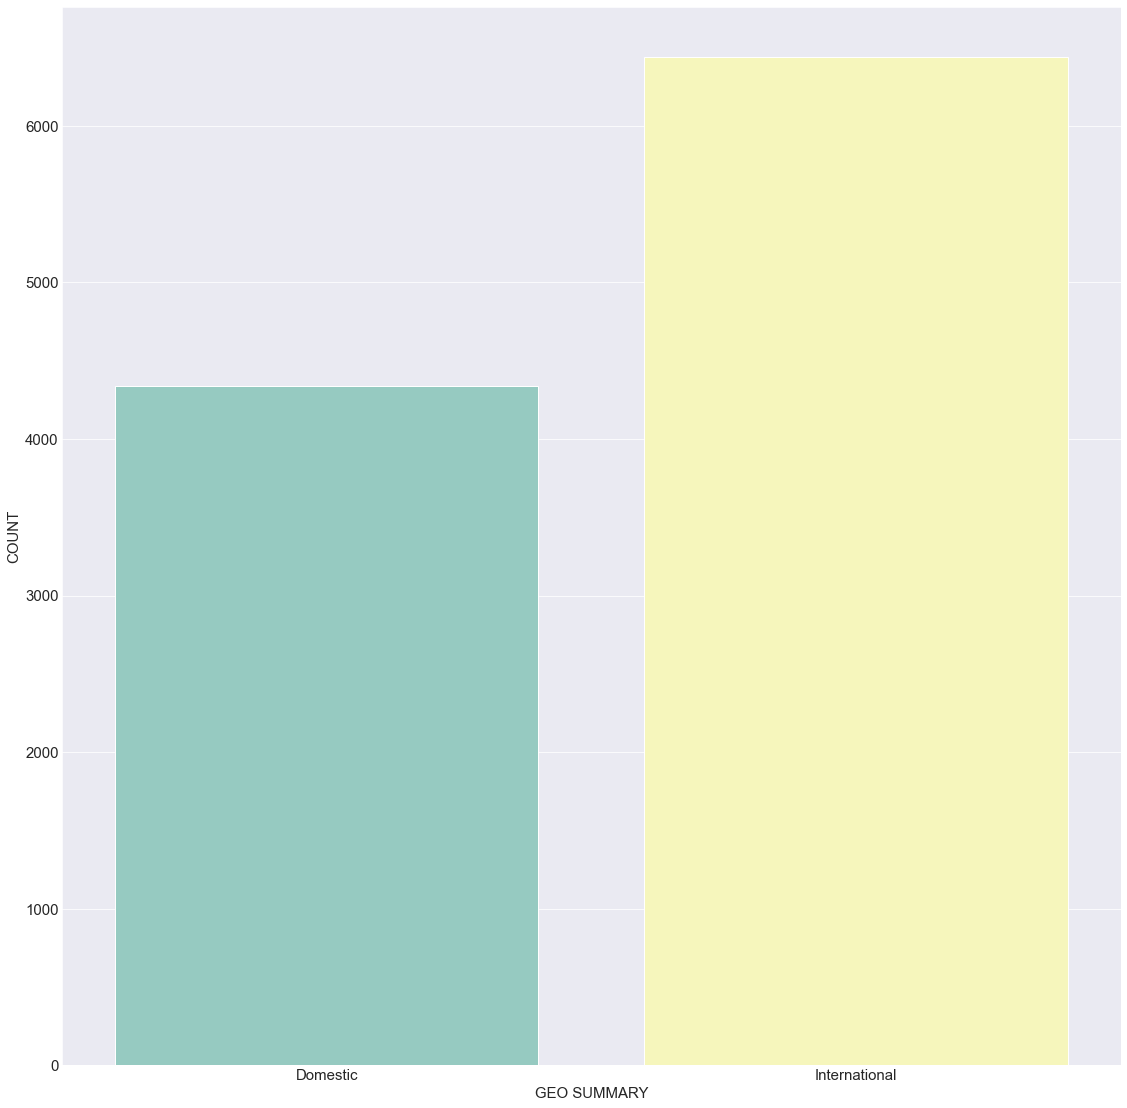

In [418]:
plt.figure(figsize = (15,15))
sns.countplot(x = "GEO Summary", palette = "Set3",data = df)
plt.xticks(fontsize=15, rotation = 0)
plt.xlabel("GEO SUMMARY", fontsize=15)
plt.yticks(fontsize=15, rotation = 0)
plt.ylabel("COUNT", fontsize=15)
plt.show()

Review data and arrive at relevant conclusions:

Above is a graph showing the count number of domestic and international flights in the dataset through SFO between July 2005 and June 2013.
We can see that there 4,300 domestic flights and 6,500 international flights reported.

This estimate matches the accurate results of the value_counts() command done below, which reports that 4,338 and 6,437, flights respectively.

In [197]:
df['GEO Summary'].value_counts()

International    6437
Domestic         4338
Name: GEO Summary, dtype: int64

# Data Munging

I need to clean up the data for a more desired format. From the `Activity Period` column I will extract the year and month and create two columns on the file sheet.

First notice the data type for the column: Activity Period - is of the numeric type (i.e.: int64).

In [425]:
type(df['Activity Period'])

pandas.core.series.Series

In [426]:
df['Activity Period']

0        200507
1        200507
2        200507
3        200507
4        200507
          ...  
10770    201303
10771    201303
10772    201303
10773    201303
10774    201303
Name: Activity Period, Length: 10775, dtype: int64

# Formating the `Activity Period` to date-type together with extraction of year and month components.

### Subset Column
The `loc` and `iloc` attributes can be used to obtain subsets of columns, rows, or both. The general syntax for `loc` and `iloc` uses square brackets with a comma. The part to the left of the comma is the row values to subset; the part to the right of the comma is the column values to subset.

Set variable for entire column as followed: .loc[:," "]

========================================================================

### Converting to datetime
Converting an object type into a `datetime` type is done with the `to_datetime` function.
Let's convert the `Activity Period` column into a proper `datetime` object.

More info about pandas.`to_datetime` found here: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

Convert argument `to_datetime`.

This function converts a scalar, array-like, `Series` or `DataFrame`/dict-like to a pandas datetime object.

Parameters:
arg : int, float, str, datetime, list, tuple, 1-d array, Series, DataFrame/dict-like

`dt.year` is the year of the datetime.
`dt.month` is the month of the datetime.

==========================================================================

### Slice

To subset column I must use Python's slicing syntax.
This method will capture all the rows for a specified column.

The Python slicing syntax uses a colon, `:`

Copy syntax like this, `df.loc[:, [columns]]`

In [198]:
# To subset column I must use Python's slicing syntax.
# This method will capture all the rows for a specified column.

# The Python slicing syntax uses a colon, `:`
# Convert argument to datetime
df.loc[:,"Activity Period"] = pandas.to_datetime(df.loc[:,"Activity Period"].astype(str), format="%Y%m")

# Create two new dataframe columns
df.loc[:,"Year"] = df["Activity Period"].dt.year
df.loc[:,"Month"] = df["Activity Period"].dt.month

In [199]:
# Output
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10770,2013-03-01,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,154428,2013,3
10771,2013-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,5029,2013,3
10772,2013-03-01,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4173,2013,3
10773,2013-03-01,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,9764,2013,3


In [200]:
import numpy

time_begin = df.loc[:,"Activity Period"].min()
time_end = df.loc[:,"Activity Period"].max()
time_range = time_end-time_begin

print("First date: ", str(time_begin)[:11])
print("Last date: ", str(time_end)[:11])
print("Time range in days:", time_range.days)
print("Time range in months:", time_range/numpy.timedelta64(1,"M"))

First date:  2005-07-01 
Last date:  2013-03-01 
Time range in days: 2800
Time range in months: 91.99367543481385


# PLOT

Count plot the column `Year` per total flights held per year. Below are the results:

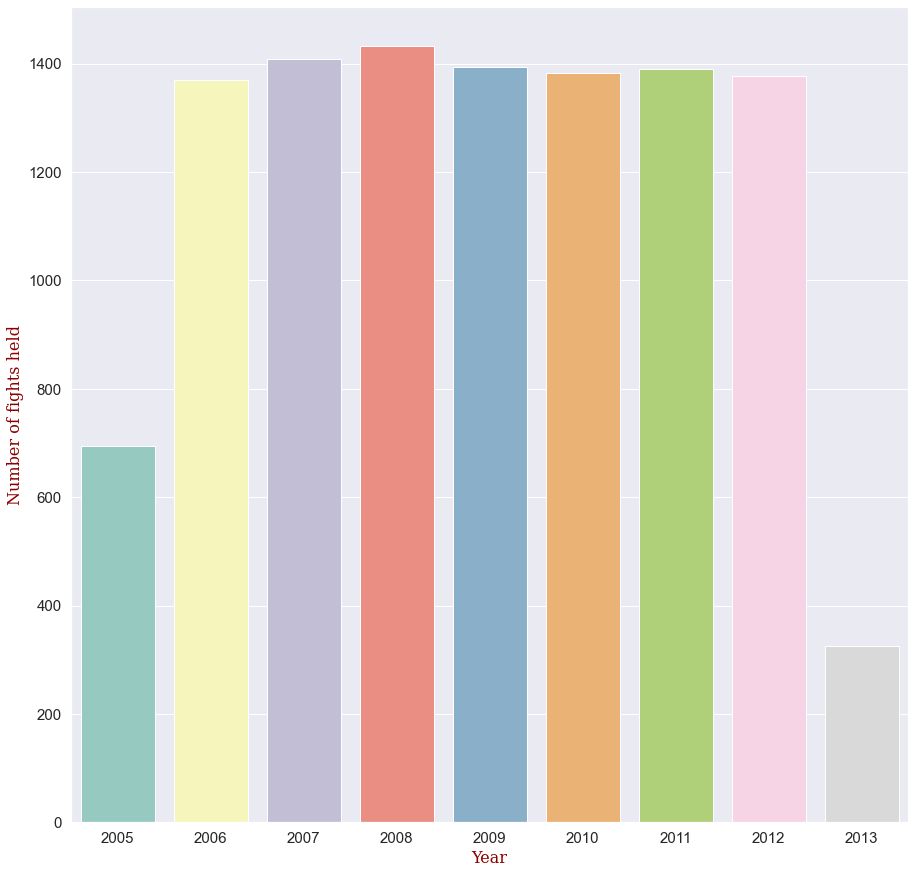

In [430]:
plt.figure(figsize = (15,15))
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
sns.countplot(x = "Year", palette = "Set3",data = df)
plt.xticks(fontsize=15, rotation = 0)
plt.xlabel("Year", fontdict=font)
plt.yticks(fontsize=15, rotation = 0)
plt.ylabel("Number of fights held", fontdict=font)
plt.show()

Review data and arrive at relevant conclusions:

Above, we see that flights were consistent between 2006 and 2012. The year 2008 has the highest peak.

I Looked into the 2008 high peak and found that in the year 2008, July 14, SFO was voted Best International Airport in North America for 2008 in the World Airports Survey by Skytrax.

Source: https://web.archive.org/web/20080730031401/http://www.worldairportawards.com/Awards_2008/ResultsFull.htm


# Next

I want to see the distribution between the so-called low-fare purchase versus non-low-fare purchase.

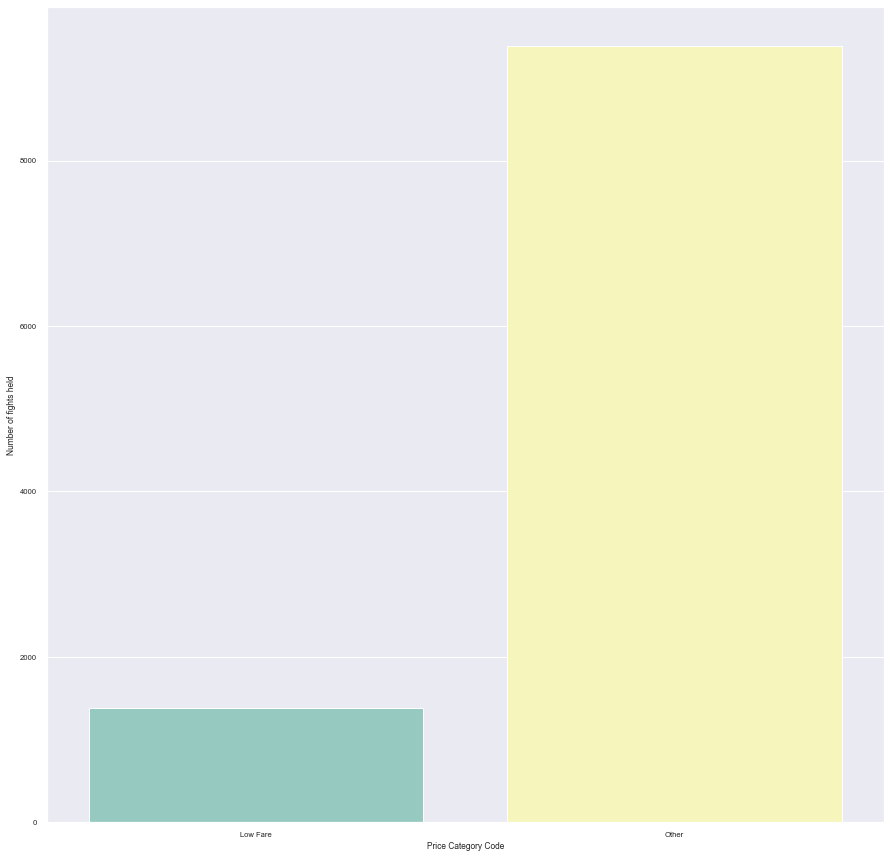

In [431]:
plt.figure(figsize = (15,15))
sns.countplot(x = "Price Category Code", palette = "Set3",data = df)
plt.xticks(rotation = 0)
plt.ylabel("Number of fights held")
plt.show()

Review data and arrive at relevant conclusions:

Above, we see that budget flights does not matter to most people. If you really want to travel you basically just buy a ticket even if is not avaiable as low-fare.

# Pandas General Function: Pivot Table

Source: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

For basic pivot table understanding, just read my comments in the code below.

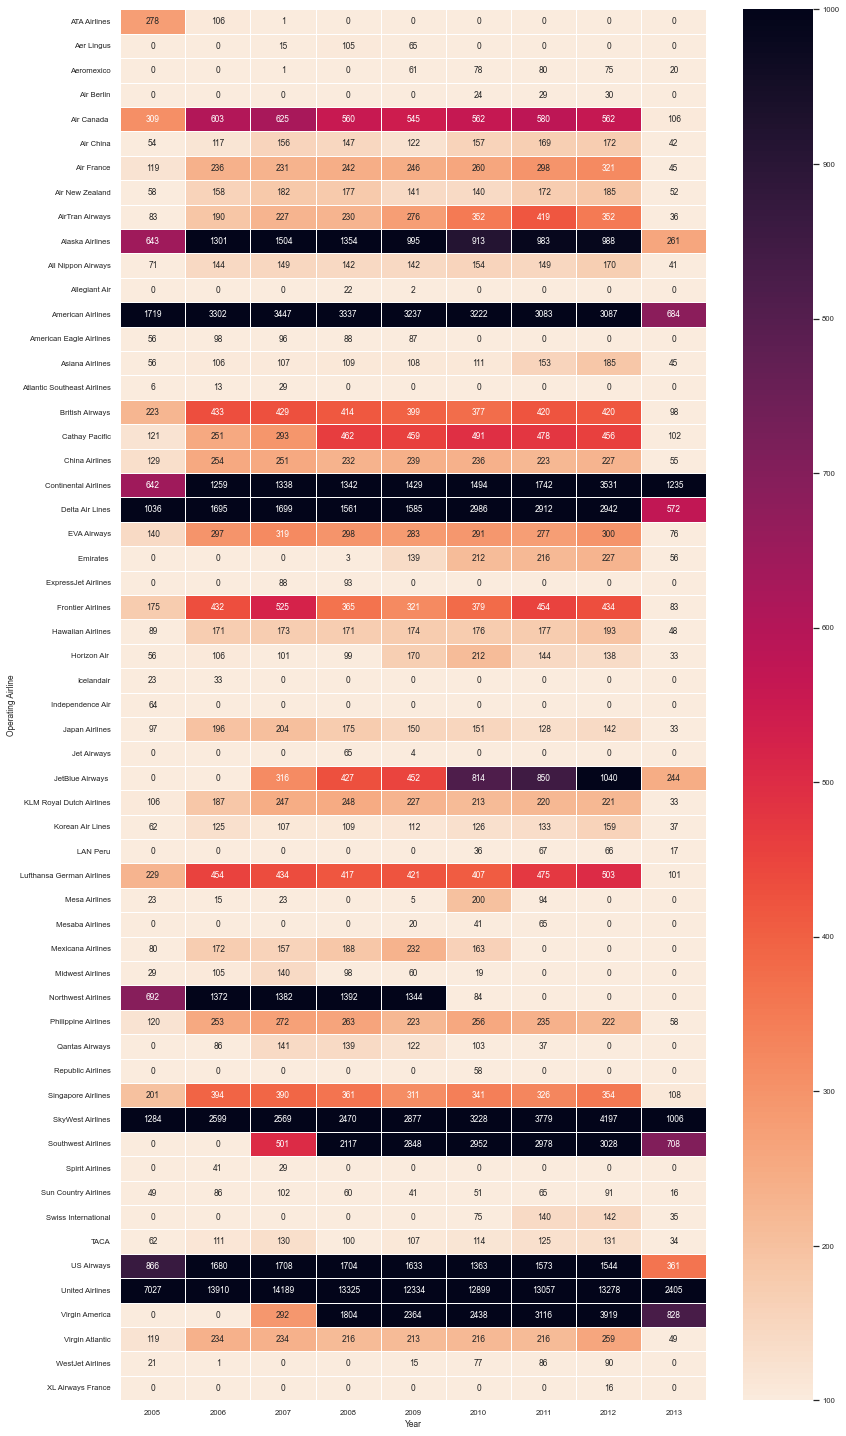

In [432]:
df_airline_yr = df.groupby(["Year","Operating Airline"])["Passenger Count"].sum().divide(1000)
df_airline_yr = df_airline_yr.reset_index()

# Pivot Table
# values: list-like or scalar; column to aggregate.
# index: column to group by on the pivot table index.
# column: column to group by on the pivot table column.
# fill_value: scalar; value to replace missing values with (in the resulting pivot table, after aggregation).

# Create Pivot table to demonstrate data analysis.
airline_traffic_yr_pivot_table = df_airline_yr.pivot_table(values="Passenger Count",index="Operating Airline",columns="Year", fill_value=0)

# this block of code is not in the output below.
# To drop United Airlines run the code again.
airline_traffic_yr_pivot_table.loc["United Airlines",:] = airline_traffic_yr_pivot_table.loc["United Airlines",:]
airline_traffic_yr_pivot_table.drop("United Airlines",axis=0, inplace=True)

# dropping the small airlines.
# Axis 1 refers to the columns of a data frame.
# Axis 0 refers to the rows of a data frame.
# This block of code is not in the output below.
# To output dataframe with the dropped list run the code again.
dropped = airline_traffic_yr_pivot_table[airline_traffic_yr_pivot_table.sum(axis=1)<13]
airline_traffic_yr_pivot_table = airline_traffic_yr_pivot_table.drop(dropped.index,axis=0)

# Plot Pivot table to demonstrate data analysis.
sns.set(font_scale=0.7)
fig1 = plt.figure(figsize=(12,20))
p1 = sns.heatmap(airline_traffic_yr_pivot_table, annot=True, linewidths=.5, vmin=100, vmax=1000, fmt='.0f', cmap=sns.cm.rocket_r)
p1.set_yticklabels(p1.get_yticklabels(), rotation=0)
plt.tight_layout()

# Pandas DataFrame nlargest()

Return the first n rows ordered by columns in descending order.

# Pandas DataFrame mean()

Return the mean of the values over the requested axis.

# AIRLINE MARKET SHARE
# TOP 8 AIRLINES OVER THE YEARS
Each column in a `DataFrame` is a `Series`. As a single column is selected, the returned object is a pandas `Series`. We can verify this by checking the type of the output.

Largest airline at SFO (July 2005 - March 2013)
Top 8 Airlines

In [433]:
avg_airline = airline_traffic_yr_pivot_table.mean(axis=1)

TOP8_airlines = avg_airline.nlargest(8).to_frame().mul(1000).astype("int64")

# Create a new column
TOP8_airlines.columns = ["Mean no. of passengers per year"]

# The loc operators are required in front of the selection brackets [].
# When using loc, the part before the comma is the rows you want, and the part after the comma is the columns you want to select.

sum_of_all = TOP8_airlines.loc[:,"Mean no. of passengers per year"].sum()

# We can use the loc attribute on the dataframe to subset rows based on the index label.
TOP8_airlines.loc[:,"Share [%]"] = TOP8_airlines.loc[:,"Mean no. of passengers per year"].div(sum_of_all).mul(100).round(1)

# Output
TOP8_airlines

,Mean no. of passengers per year,Share [%]
Operating Airline,,
United Airlines,11380317,45.5
American Airlines,2791050,11.2
SkyWest Airlines,2667629,10.7
Delta Air Lines,1887591,7.6
Southwest Airlines,1681312,6.7
Virgin America,1640080,6.6
Continental Airlines,1557001,6.2
US Airways,1381392,5.5


# PLOT TWO VARIABLES
Show value counts for two categorical variables and using hue parameter:

While the points are plotted in two dimensions, another dimension can be added to the plot by coloring the points according to a third variable.



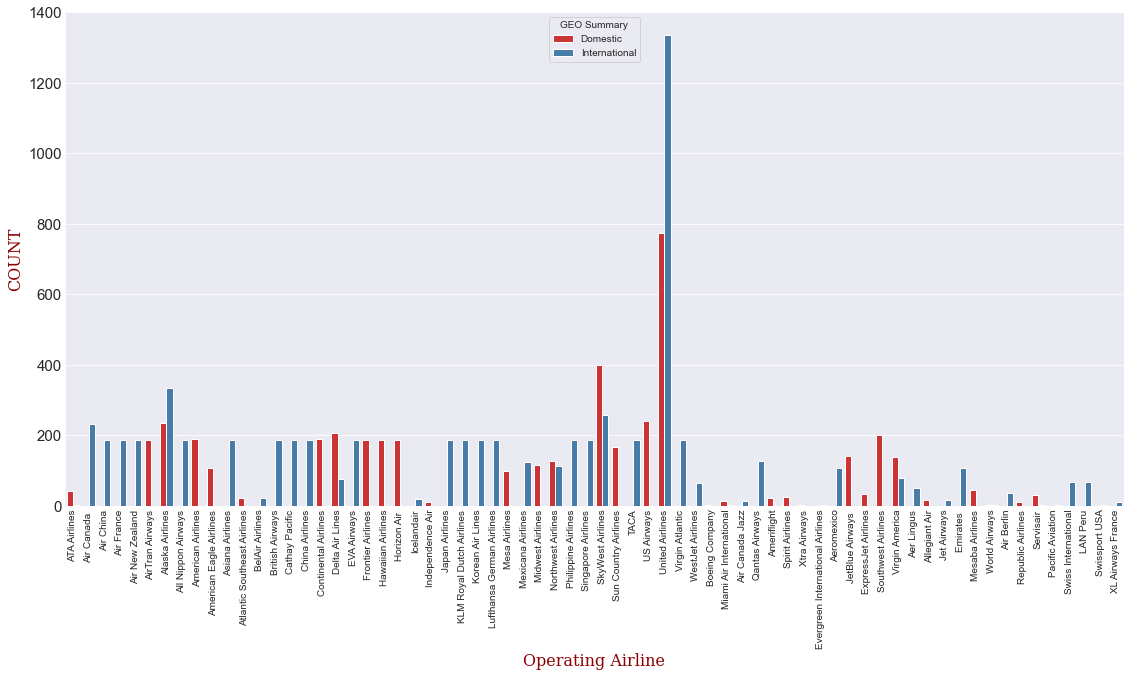

In [479]:
plt.figure(figsize = (15,7))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

sns.countplot(x = "Operating Airline", hue="GEO Summary", palette = "Set1",data = df)

plt.xticks(fontsize=10, rotation = 90)
plt.xlabel("Operating Airline", fontdict=font)
plt.ylabel("COUNT", fontdict=font)
plt.yticks(fontsize=15, rotation = 0)
plt.show()


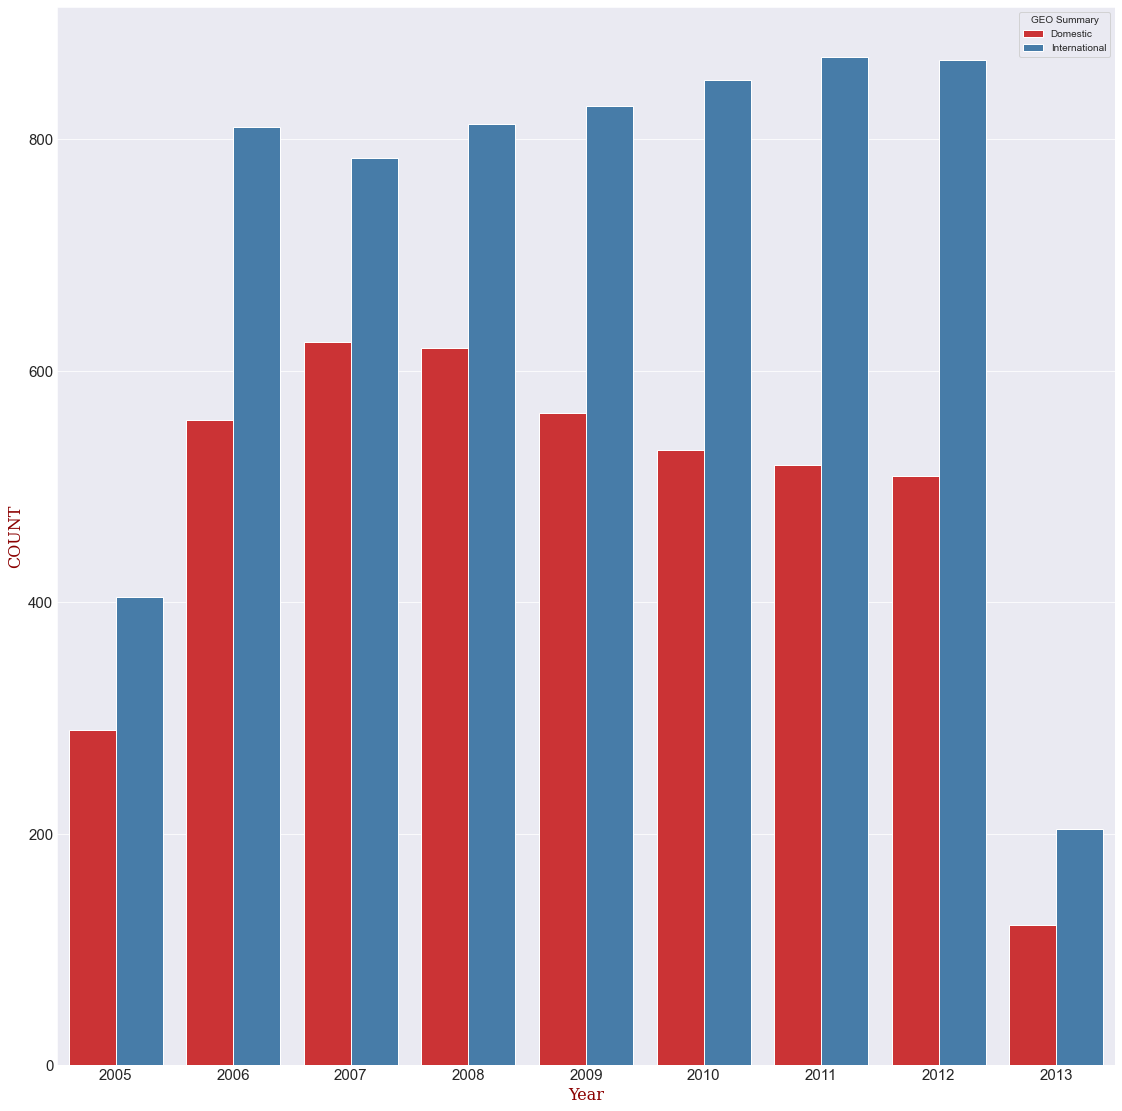

In [480]:
plt.figure(figsize = (15,15))

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
sns.countplot(x = "Year", hue = "GEO Summary", palette = "Set1",data = df)

plt.xticks(fontsize=15, rotation = 0)
plt.xlabel("Year", fontdict=font)
plt.ylabel("COUNT", fontdict=font)
plt.yticks(fontsize=15, rotation = 0)
plt.show()


# Next
which terminals at SFO were the most trafficked?

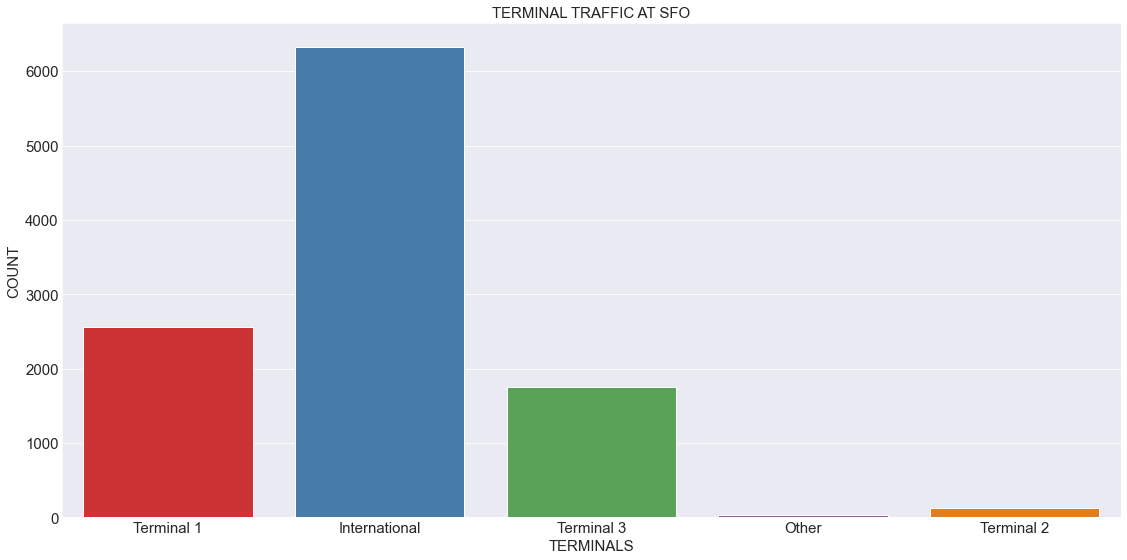

In [478]:
plt.figure(figsize = (15,7))
sns.countplot(x = "Terminal", palette = "Set1",data = df)
plt.title("TERMINAL TRAFFIC AT SFO", fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("TERMINALS", fontsize=15)
plt.ylabel("COUNT", fontsize=15)
plt.yticks(fontsize=15)
plt.show()


Review data and arrive at relevant conclusions:

Above, we can see that the international terminal had the most traffic.

# Time Series Plot

Passenger (PAX) traffic at the airport over the years of 2005-2013

Note:
It is convenient to annotate certain features of the plot to draw the reader's attention. To communicate data like this, can be done manually with the `plt.text` / `ax.text` command, which will place text at a particular x/y value:

The `ax.text` method takes an x position, a y position, a string, and then optional keywords specifying the color, size, style, alignment, and other properties of the text.

API Reference: Axes.text(x, y, s, fontdict=None, **kwargs)
Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html

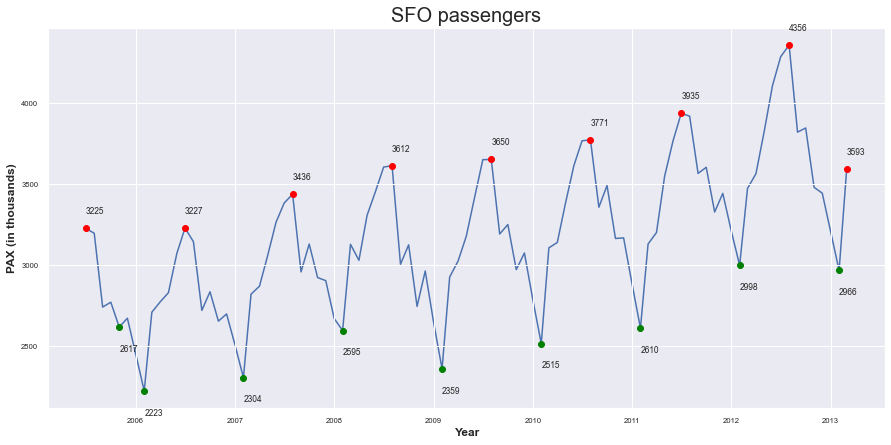

In [437]:
# Time series
# Plotting the main PAX line

# GROUP TWO COLUMNS
TimeSeries1 = df.groupby("Activity Period")["Passenger Count"].sum().divide(1000)
# =============================================================
# PLOT FIGURE PARAMETERS
fig, ax = plt.subplots(figsize=(15,7))
# =============================================================
# Draw a line plot with possibility of several semantic groupings.
# Series.index
# The index (axis labels) of the Series.

# Series.values
# Return Series as ndarray or ndarray-like depending on the d-type.

# seaborn.lineplot(data=None, x, y, ax)
sns.lineplot(x=TimeSeries1.index, y=TimeSeries1.values, markers=True, ax=ax,zorder=0)
# ================================================================
# Series.isin(values)
# Whether elements in Series are contained in values.

# Series.to_frame
# Convert Series to DataFrame.
# ==============================================================
# CODE: MAX PAX FOR EACH YEAR
TimeSeries1_max = TimeSeries1.groupby(TimeSeries1.index.year).max()
TimeSeries1_max_complete = TimeSeries1[TimeSeries1.isin(TimeSeries1_max.values)].to_frame()

# SCATTER PLOT MAX points of interest.
plt.scatter(TimeSeries1_max_complete.index, TimeSeries1_max_complete.values, color = "red", zorder=2) # PLOT

# for loops are used when you have a block of code which you want to repeat a fixed number of times.
# the int() function converts the specified value into an integer number.

# Annotating each marker on MAX points
# Add labels to the plot with ax.text(x,y,s)
for t,v in TimeSeries1_max_complete.reset_index().values:
    ax.text(t,v+90,int(v))
# ===============================================================
# CODE: MIN PAX FOR EACH YEAR
TimeSeries1_min = TimeSeries1.groupby(TimeSeries1.index.year).min()
TimeSeries1_min_complete = TimeSeries1[TimeSeries1.isin(TimeSeries1_min.values)].to_frame()

# SCATTER PLOT MIN points of interest
plt.scatter(TimeSeries1_min_complete.index, TimeSeries1_min_complete.values, color = "green", zorder=2)  # PLOT

# Annotating each marker for MIN
# Add labels to the plot with ax.text(x,y,s)
for t,v in TimeSeries1_min_complete.reset_index().values:
    ax.text(t,v-150,int(v))
# ===============================================================
# PLOT FEATURES: TITLE AND LABELS
plt.title("SFO passengers", size = 20)
plt.xlabel("Year", fontweight="bold", size = 12)
plt.ylabel("PAX (in thousands)", fontweight="bold", size = 12)
plt.show()

Now that we’re able to load a simple data file, we want to be able to inspect its contents.

The best way to look at our data is to inspect it in parts by looking at various subsets of the data.


# Subsetting Columns by Name
If we want only a specific column from our data, we can access the data using square brackets.

In [7]:
# just get the operating airline column and save it to its own variable

airlines_df = df['Operating Airline']

In [8]:
# show the first 5 observations

print(airlines_df.head())

0    ATA Airlines
1    ATA Airlines
2    ATA Airlines
3     Air Canada 
4     Air Canada 
Name: Operating Airline, dtype: object


To specify multiple columns by the column name, we need to pass in a Python list between the square brackets. This may look a bit strange since there will be two sets of square brackets.

In [9]:
# Looking at airline, region, and passenger count

subset = df[['Operating Airline', 'Passenger Count', 'Activity Period', 'Activity Type Code', 'GEO Region']]

# print the first 5 results

print(subset.head())

  Operating Airline  Passenger Count  Activity Period Activity Type Code  \
0      ATA Airlines            27271           200507           Deplaned   
1      ATA Airlines            29131           200507           Enplaned   
2      ATA Airlines             5415           200507     Thru / Transit   
3       Air Canada             35156           200507           Deplaned   
4       Air Canada             34090           200507           Enplaned   

  GEO Region  
0         US  
1         US  
2         US  
3     Canada  
4     Canada  


We can use the loc attribute on the dataframe to subset rows based on the index label.

In [11]:
# get the first row

# Python counts from 0

print(df.loc[0])

Activity Period                      200507
Operating Airline              ATA Airlines
Operating Airline IATA Code              TZ
Published Airline              ATA Airlines
Published Airline IATA Code              TZ
GEO Summary                        Domestic
GEO Region                               US
Activity Type Code                 Deplaned
Price Category Code                Low Fare
Terminal                         Terminal 1
Boarding Area                             B
Passenger Count                       27271
Name: 0, dtype: object


In [12]:
subset_loc = df.loc[0]
print(type(subset_loc))

<class 'pandas.core.series.Series'>


There are several initial questions that we can ask ourselves:

1. For each year in our data, what was the total passenger count ?

2. How many airlines are listed as with the most passenger count?

# Grouped Means
To answer the questions just posed, we need to perform a grouped (i.e., aggregate) calculation. In other words, we need to perform a calculation, be it an average or a sum total, but apply it to each subset of a variable.

We accomplish grouped/aggregate computations by using the groupby method on dataframes.

In [439]:
# For each year range in our data, what was the average passenger count?

# To answer this question,

# we need to split our data into parts by each year;

# then we get the 'Passenger Count' column and calculate the mean
print(df.groupby('Year')['Passenger Count'].mean())

Year
2005    24779.903597
2006    24348.407597
2007    25233.557133
2008    25983.725052
2009    26804.696339
2010    28383.224150
2011    29444.450360
2012    32220.526125
2013    30044.547692
Name: Passenger Count, dtype: float64


In [256]:
dfg = df.groupby('Year')['Passenger Count'].sum().reset_index()

In [257]:
print(dfg)

   Year  Passenger Count
0  2005         17222033
1  2006         33332970
2  2007         35554082
3  2008         37234678
4  2009         37338942
5  2010         39253999
6  2011         40927786
7  2012         44399885
8  2013          9764478


In [457]:
multi_group_var = df.groupby(['Year', 'Operating Airline'])[['Passenger Count']].mean()


print(multi_group_var)

                        Passenger Count
Year Operating Airline                 
2005 ATA Airlines          13877.000000
     Air Canada            25728.833333
     Air Canada Jazz         531.500000
     Air China              4535.083333
     Air France             9944.750000
...                                 ...
2013 TACA                   5623.000000
     US Airways            60139.833333
     United Airlines       53445.755556
     Virgin America        69003.666667
     Virgin Atlantic        8172.666667

[404 rows x 1 columns]


# Sort CSV data set.

In [25]:
df.sort_values(by = 'Passenger Count', ascending= False)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
93,200507,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,443656
8470,201107,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,437967
1343,200606,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,433650
8588,201108,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 3,F,430111
8471,201107,United Airlines,UA,United Airlines,UA,Domestic,US,Enplaned,Other,Terminal 3,F,428431
...,...,...,...,...,...,...,...,...,...,...,...,...
3500,200801,Ameriflight,A8,Ameriflight,A8,Domestic,US,Deplaned,Other,Other,Other,1
9064,201112,United Airlines,UA,United Airlines,UA,International,Mexico,Thru / Transit,Other,International,G,1
1862,200611,Ameriflight,A8,Ameriflight,A8,Domestic,US,Enplaned,Other,Other,Other,1
4215,200807,Ameriflight,A8,Ameriflight,A8,Domestic,US,Deplaned,Other,Other,Other,1


The info in the CSV are sorted by values in the activity period column. What if we wanted to see the five operating airlines with the most recent activity period? We can sort the DataFrame by the values in another column, such as activity period:

In [30]:
df.sort_values(by = "Activity Period", ascending = False).head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
10774,201303,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,9007
10706,201303,EVA Airways,BR,EVA Airways,BR,International,Asia,Deplaned,Other,International,G,13136
10695,201303,Cathay Pacific,CX,Cathay Pacific,CX,International,Asia,Deplaned,Other,International,A,18296
10696,201303,Cathay Pacific,CX,Cathay Pacific,CX,International,Asia,Enplaned,Other,International,A,17400
10697,201303,China Airlines,CI,China Airlines,CI,International,Asia,Deplaned,Other,International,A,9057


We can also sort DataFrames by values across multiple columns. Let’s sort dataframe first by the operating airline column’s values and then by the activity period column’s values. Now we can see the films organized alphabetically by both studio and release date:

In [31]:
df.sort_values(by = ["Operating Airline", "Activity Period"]).head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
115,200508,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27472
116,200508,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,26535


# Counting values in a Series
Let’s try a more sophisticated analysis. What if we wanted to find out which airline had the greatest count? To solve this problem, we’ll need to count the number of times each airline appears in the operating airline column.

This includes both international and domestic flights.

In [26]:
df['Operating Airline']

0           ATA Airlines
1           ATA Airlines
2           ATA Airlines
3            Air Canada 
4            Air Canada 
              ...       
10770     Virgin America
10771     Virgin America
10772     Virgin America
10773    Virgin Atlantic
10774    Virgin Atlantic
Name: Operating Airline, Length: 10775, dtype: object

Now that we’ve isolated the Operating Airline column, we can count each unique value’s number of occurrences. Let’s limit our results to the top 10 airlines:

The return value above is yet another Series object! This time around, pandas uses the airlines from the operating airline column as the index labels and their counts as the Series values.

In [342]:
df['Operating Airline'].value_counts().head(68)

United Airlines                     2109
SkyWest Airlines                     656
Alaska Airlines                      571
Delta Air Lines                      281
Northwest Airlines                   240
                                    ... 
Swissport USA                          3
Pacific Aviation                       2
Evergreen International Airlines       2
Xtra Airways                           2
Boeing Company                         1
Name: Operating Airline, Length: 68, dtype: int64

# Filtering a column by one or more criteria
You’ll often want to extract a subset of rows based on one or more criteria. Excel offers the Filter tool for this exact purpose.

What if we wanted to find only the flights released by American Airlines? We can accomplish this task with one line of code in pandas:



In [33]:
df[df["Operating Airline"] == "American Airlines"]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
23,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,166577
24,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,160890
138,200508,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,162064
139,200508,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,157700
257,200509,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,135043
...,...,...,...,...,...,...,...,...,...,...,...,...
10473,201301,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 2,D,107507
10579,201302,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 2,D,103996
10580,201302,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 2,D,104109
10689,201303,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 2,D,125005


We can assign the filtering condition to a variable to provide context for readers:

In [35]:
flights_by_AA = (df["Operating Airline"] == "American Airlines")

df[flights_by_AA].head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
23,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,166577
24,200507,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,160890
138,200508,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,162064
139,200508,American Airlines,AA,American Airlines,AA,Domestic,US,Enplaned,Other,Terminal 3,E,157700
257,200509,American Airlines,AA,American Airlines,AA,Domestic,US,Deplaned,Other,Terminal 3,E,135043


We can also filter DataFrame rows by multiple criteria. The next example targets all flights released by American Airlines and released in 2013 during the first month (January):

In [272]:
flights_by_AA = df["Operating Airline"] == "American Airlines"

released_in_201301 = df["Activity Period"] == 200501


df[flights_by_AA & released_in_201301]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month


Pandas provides additional ways to filter a DataFrame. We can target column values less than or greater than a specific value, for example. Here, we target airlines flights before 2006: Remember this CSV covers information from 2005 to 2013. Therefore,

In [52]:
before_2006 = df["Activity Period"] < 200601

df[before_2006]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
690,200512,United Airlines,UA,United Airlines,UA,International,Mexico,Thru / Transit,Other,International,G,123
691,200512,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,8179
692,200512,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,Other,International,A,8798
693,200512,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,1156


# Grouping Data
Calculating the passengers per year. First, we’ll need to identify the year column and bucket the passenger count (or rows) that belong to each year. This process is called grouping. In the next example, we group the DataFrame’s rows based on values in the `Year` column:

In [433]:
years_grouped = df.groupby("Year")

We can ask pandas to count the number of passengers per year:

In [434]:
print(years_grouped["Passenger Count"].sum())

Year
2005    17222033
2006    33332970
2007    35554082
2008    37234678
2009    37338942
2010    39253999
2011    40927786
2012    44399885
2013     9764478
Name: Passenger Count, dtype: int64


The previous results are sorted by year date. We can instead sort the Series by count of passengers, from most to least:

In [438]:
years_grouped["Passenger Count"].count().sort_values(ascending = False).head(9)

Year
2008    1433
2007    1409
2009    1393
2011    1390
2010    1383
2012    1378
2006    1369
2005     695
2013     325
Name: Passenger Count, dtype: int64

# Pandas DataFrame Query
single query

In [14]:
# single query sample
dfq = df.query(' `Operating Airline`== "United Airlines"  ')

double query

In [396]:
# query for all domestic time-series
dfq2 = df.query(' `GEO Summary`== "Domestic" ')\
    .query(' `Activity Period` > 2005')

In [370]:
# query for all international time-series
dfq3 = df.query(' `GEO Summary` == "International"  ')\
    .query(' `Activity Period` > 2005')

In [407]:
# query for Fiscal Yar (YR) 2012-2013 international flights
dfq4 = df.query(' `GEO Summary` == "International"')\
    .query(' `Activity Period` > 2012')

# Grouped Query

In [409]:
# group and sum all 2012-2013 international flights by passenger value
international_pax_2012 = dfq4.groupby('Activity Period')['Passenger Count'].sum().reset_index()

In [383]:
# group and sum all international flights by year and passenger value
international_only_years2 = dfq3.groupby('Activity Period')['Passenger Count'].sum().reset_index()

In [222]:
# group and sum all domestic flights by year and passenger value
domestic_only = dfq3.groupby(['Year', 'Operating Airline'])[['Passenger Count']].sum().reset_index()

# Domestic Passenger (PAX) Time-Series

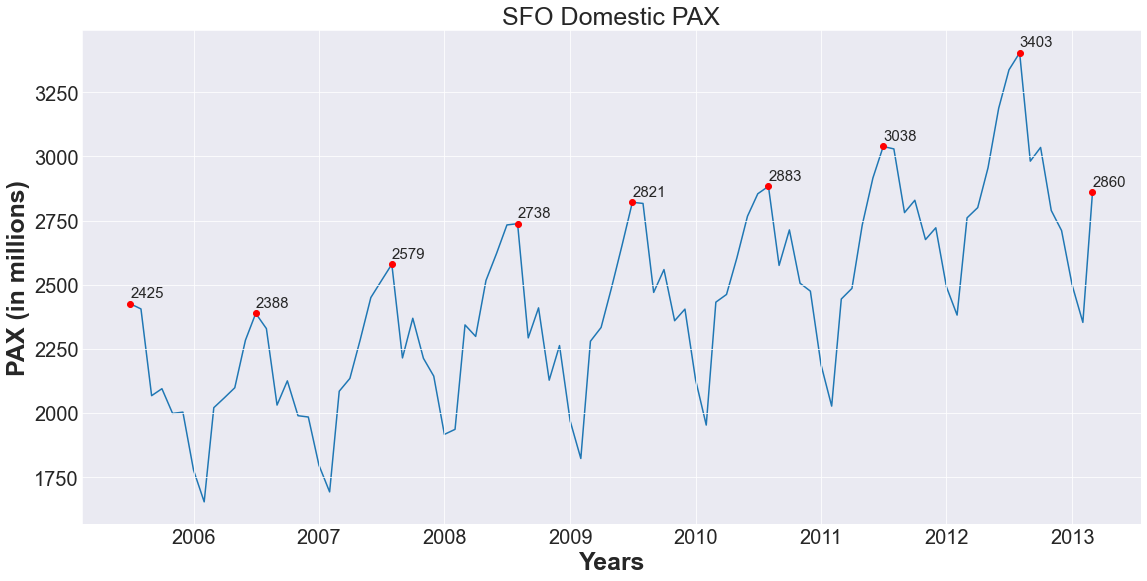

In [417]:
# GROUP TWO COLUMNS
domestic_only_years = dfq2.groupby("Activity Period")["Passenger Count"].sum().divide(1000)

# =============================================================
# PLOT FIGURE PARAMETERS
fig, ax = plt.subplots(figsize=(15,7))
# =============================================================

# seaborn.lineplot(data=None, x, y, ax)
sns.lineplot(x=domestic_only_years.index, y=domestic_only_years.values, markers=True, ax=ax,zorder=0)

# ===============================================================
# CODE: MAX PAX FOR EACH YEAR
domestic_only_max = domestic_only_years.groupby(domestic_only_years.index.year).max()
domestic_only_max_complete = domestic_only_years[domestic_only_years.isin(domestic_only_max.values)].to_frame()

# SCATTER PLOT MAX points of interest.
plt.scatter(domestic_only_max_complete.index, domestic_only_max_complete.values, color = "red", zorder=2) # PLOT

# for loops are used when you have a block of code which you want to repeat a fixed number of times.
# the int() function converts the specified value into an integer number.

# Annotating each marker on MAX points
# Add labels to the plot with ax.text(x,y,s)
for t,v in domestic_only_max_complete.reset_index().values:
    ax.text(t,v+25,int(v), fontsize=15)
# ================================================================
plt.title("SFO Domestic PAX", size = 25)
plt.xticks(fontsize = 20)
plt.xlabel("Years", fontweight="bold", size = 25)
plt.yticks(fontsize = 20)
plt.ylabel("PAX (in millions)", fontweight="bold", size = 25)
plt.show()

# International Passenger (PAX) Time-Series

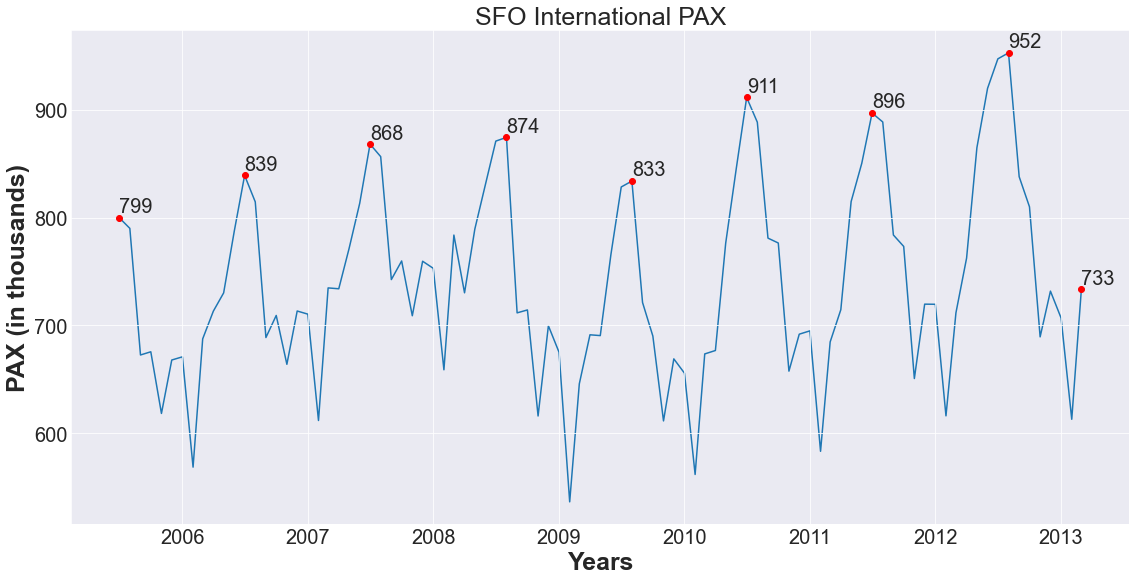

In [406]:
# GROUP TWO COLUMNS
international_only_years = dfq3.groupby("Activity Period")["Passenger Count"].sum().divide(1000)
# =============================================================
# PLOT FIGURE PARAMETERS
fig, ax = plt.subplots(figsize=(15,7))
# =============================================================

# seaborn.lineplot(data=None, x, y, ax)
sns.lineplot(x=international_only_years.index, y=international_only_years.values, markers=True, ax=ax,zorder=0)

# ===============================================================
# CODE: MAX PAX FOR EACH YEAR
international_only_max = international_only_years.groupby(international_only_years.index.year).max()
international_only_max_complete = international_only_years[international_only_years.isin(international_only_max.values)].to_frame()

# SCATTER PLOT MAX points of interest.
plt.scatter(international_only_max_complete.index, international_only_max_complete.values, color = "red", zorder=2) # PLOT

# for loops are used when you have a block of code which you want to repeat a fixed number of times.
# the int() function converts the specified value into an integer number.

# Annotating each marker on MAX points
# Add labels to the plot with ax.text(x,y,s)
for t,v in international_only_max_complete.reset_index().values:
    ax.text(t,v+5,int(v), fontsize= 20)
# ================================================================
plt.title("SFO International PAX", size = 25)
plt.xticks(fontsize=20)
plt.xlabel("Years", fontweight="bold", size = 25)
plt.yticks(fontsize = 20)
plt.ylabel("PAX (in thousands)", fontweight="bold", size = 25)
plt.show()

# AIRLINE MARKET SHARE
# Top 8 International

In [428]:
dfq5 = df.query(' `GEO Summary` == "International" ')\
    .query(' `Activity Period` > 2005')

In [439]:
international_pax_airlines = dfq5.groupby("Operating Airline")['Passenger Count'].sum().reset_index()

In [444]:
international_pax_airlines_sorted = dfq5.groupby("Operating Airline")['Passenger Count'].sum().sort_values(ascending = False).head(8)

In [457]:
international_pax_airlines2 = dfq5.groupby(["Year", "Operating Airline"])["Passenger Count"].sum().divide(1000)
international_pax_airlines2 = international_pax_airlines2.reset_index()

In [458]:
# Create Pivot table to demonstrate data analysis.
inter_airline_traffic_yr_pivot_table = international_pax_airlines2.pivot_table(values="Passenger Count",index="Operating Airline",columns="Year", fill_value=0)

In [486]:
avg_inter_airline = inter_airline_traffic_yr_pivot_table.mean(axis=1)

TOP8_inter_airlines = avg_inter_airline.nlargest(8).to_frame().mul(1000).astype("int64")

# Create a new column
TOP8_inter_airlines.columns = ["Mean no. of passengers per year"]

# The loc operators are required in front of the selection brackets [].
# When using loc, the part before the comma is the rows you want, and the part after the comma is the columns you want to select.

sum_of_all2 = TOP8_inter_airlines.loc[:,"Mean no. of passengers per year"].sum()

# We can use the loc attribute on the dataframe to subset rows based on the index label.
TOP8_inter_airlines.loc[:,"Share [%]"] = TOP8_inter_airlines.loc[:,"Mean no. of passengers per year"].div(sum_of_all2).mul(100).round(1)

# Output
print(TOP8_inter_airlines)

                           Mean no. of passengers per year  Share [%]
Operating Airline                                                    
United Airlines                                    2595558       52.3
Air Canada                                          494585       10.0
Lufthansa German Airlines                           382355        7.7
British Airways                                     357133        7.2
Cathay Pacific                                      345975        7.0
Singapore Airlines                                  309717        6.2
EVA Airways                                         253512        5.1
Alaska Airlines                                     226742        4.6


# PIE CHART for Top 8 International Airline

([<matplotlib.patches.Wedge at 0x29704faf0>,
 [Text(-0.08717493802411254, 1.0965402547013459, 'United Airline'),
  Text(-0.9777190099662831, -0.5040491419996183, 'Air Canada'),
  Text(-0.5500000371631099, -0.9526279227067501, 'Lufthansa German Airlines'),
  Text(-0.05234016040118506, -1.0987540705768413, 'British Airways'),
  Text(0.4249795710958525, -1.0145897516490028, 'Cathay Pacific'),
  Text(0.7961073891508564, -0.7590869679683659, 'Singapore Airlines'),
  Text(1.0077192736663725, -0.4410236563738038, 'EVA Airways'),
  Text(1.0911502843520702, -0.1392517754227804, 'Alaska Airlines ')])

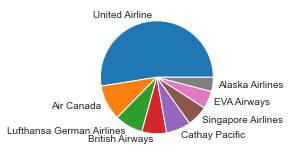

In [490]:
sizes = [52.3,10.0,7.7,7.2,7.0,6.2,5.1,4.6]
labels = "United Airline", "Air Canada", "Lufthansa German Airlines", "British Airways", "Cathay Pacific", "Singapore Airlines", "EVA Airways", "Alaska Airlines "
fig3, ax3 = plt.subplots()
ax3.pie(sizes, labels=labels)